In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task2-spills.ipynb")

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/sofiasarak/eds220-hwk3.git


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 

## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your commit history if you try to push them.

## 2. Datasets description
- Read the metadata for both datsets and write a brief description about each one. Indicate the date sources and date of access.

**Spills Data Set**

This data comes from the New York State Department of Environmental Conservation and can be accessed at data.ny.gov. It contains records of spills of petroleum and other hazardous materials in New York. The information for this data set is continuously updated, as per state law and regulations, spills with the capacity to pollute the lands or waters must be reported by the spiller (and, in some cases, by anyone who has knowledge of the spill). It includes information such as date of the spill, its location, its size, and the material. The last time this data was updated is November 7, 2025. 

Date of Access: November 4, 2025

**2023 Counties**

The TIGER/Line Shapefiles come from the U.S. Census Bureau and can be accessed at census.gov. Shapefiles for geometries such as state lines, school districts, and census tracts are all provided, but our analysis will utilize those that correspond to state county boundaries. They contain current geographic extent and boundaries of both legal and
statistical entities (which have no governmental standing) for the United States, the District of Columbia, Puerto Rico, and the Island Areas. There are different shapefiles for each year, and we will use the 2023 county lines. 

Date of Access: November 4, 2025


## 3. Import libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [3]:
# Use os library to create a file path describing location of spills data csv
fp = os.path.join('data', 'Spill_Incidents_20251103.csv')
# Read in spills data using predetermined file path and geopandas library
spills = gpd.read_file(fp)

# Use os library to create file path for counties data
fp = os.path.join('data', 'tl_2023_us_county', 'tl_2023_us_county.shp')
# Read in counties data using fp and geopandas
counties = gpd.read_file(fp)

<!-- BEGIN QUESTION -->

## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head

b. Check the data types of the columns

c. Check the unique values in the `material_family` column

d. Check the unique values in the `county` column

e. Insert a markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells for preliminary data exploration.

In [4]:
#a. Check the dataframe's head

# Use .head() to access first 5 rows (default)
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,...,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered,geometry
0,0107132,MH 864,RT 119/MILLWOOD RD,,ELMSFORD,Westchester,,6000,3,10/10/2001,...,Unknown,,Unknown,10/15/2001,unknown material,Other,10,Gallons,0,None
1,0405586,BOWRY BAY,WATER POLL CONTROL,,QUEENS,Queens,,4101,2,08/21/2004,...,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,,0,None
2,0405586,BOWRY BAY,WATER POLL CONTROL,,QUEENS,Queens,,4101,2,08/21/2004,...,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,Pounds,0,None
3,0204667,POLE 16091,GRACE AVE/BURKE AVE,,BRONX,Bronx,,0301,2,08/02/2002,...,Equipment Failure,,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1,Gallons,0,None
4,0210559,POLE ON,FERDALE LOMIS RD / RT 52,,LIBERTY,Sullivan,,5336,3,01/20/2003,...,Traffic Accident,,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6,Gallons,6,None


In [5]:
#b. Check the data types of the columns

# Use .dtypes to print data types of all columns
spills.dtypes

Spill Number               object
Program Facility Name      object
Street 1                   object
Street 2                   object
Locality                   object
County                     object
ZIP Code                   object
SWIS Code                  object
DEC Region                 object
Spill Date                 object
Received Date              object
Contributing Factor        object
Waterbody                  object
Source                     object
Close Date                 object
Material Name              object
Material Family            object
Quantity                   object
Units                      object
Recovered                  object
geometry                 geometry
dtype: object

In [6]:
#c. Check the unique values in the `material_family` column

# In order to access 'material_family' column, we first have to update column names
# Put column name strings into lowercase, and replace spaces with underscores (using .str methods)
spills.columns = spills.columns.str.lower().str.replace(' ','_')

# Access 'material_family' column, and find unique values using .unique() method
spills.material_family.unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [7]:
#d. Check the unique values in the `county` column

# Find unique values using .unique() method (returns all unique observations)
spills.county.unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'Schuyler', 'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex',
       'Chenango', 'Erie', 'Livingston', 'Oneida', 'Wayne', 'Suffolk',
       'Orleans', 'Ontario', 'Genesee', 'Otsego', 'Tompkins', 'Madison',
       'Chemung', 'Seneca', 'Broome', 'Hamilton', 'Washington', 'Steuben',
       'Rensselaer', 'Franklin', 'Columbia', 'Fulton', 'Herkimer',
       'Schoharie', 'Montgomery', 'Putnam', 'Delaware',
       'New Jersey - Region 2', 'Tioga', 'Chautauqua', 'Cattaraugus',
       'Wyoming', 'Yates', 'Greene', 'Pennsylvania - Region 9',
       'Allegany', 'New Jersey - Region 3 (N)',
       'Cattaraugus Indian Reservation', 'New Jersey - Region 3 (T)',
       'Canada - Region 6', 'Canada - Region 9',
       '

e. Type your answer here, replacing this text.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.B. Cleaning
a. Simplify column names as needed.

In [8]:
# Achieved in question 5c, but code is: 

spills.columns = spills.columns.str.lower().str.replace(' ','_')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Update column data types as needed *for this analysis*.

In [9]:
# Convert `spill_date` column to a datetime object to aid in future subsetting
spills['spill_date'] = pd.to_datetime(spills['spill_date'])

# Confirm conversion worked -- spill_date column should be listed as datetime
spills.dtypes

spill_number                     object
program_facility_name            object
street_1                         object
street_2                         object
locality                         object
county                           object
zip_code                         object
swis_code                        object
dec_region                       object
spill_date               datetime64[ns]
received_date                    object
contributing_factor              object
waterbody                        object
source                           object
close_date                       object
material_name                    object
material_family                  object
quantity                         object
units                            object
recovered                        object
geometry                       geometry
dtype: object

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [10]:
# Subset data based on 3 comparisons
# 1. spill_date is greater than (after) January 1, 2023
# 2. spill_date is less than (before) October 31, 2023
# 3. material_family is "Petroleum", to select only petroleum spills
petr_23 = spills[(spills['spill_date'] >= pd.to_datetime('2023-01-01')) &  # converting dates to datetime objects for comparison
                 (spills['spill_date'] <= pd.to_datetime('2023-10-31')) &
                 (spills['material_family'] == "Petroleum")]

# Can confirm selection by ensuring that sorted spill dates start at January 1st and end at October 31st
petr_23.sort_values('spill_date')

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,...,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered,geometry
33300,2208528,ALBANESE - AST FILL PORT,134 WEBSTER AVE,,HARRISON,Westchester,,6028,3,2023-01-01,...,Equipment Failure,,Private Dwelling,,#2 fuel oil,Petroleum,0,,0,None
534197,2208120,VACANT RESIDENTIAL,200 MAIN STREET,,TUPPER LAKE,Franklin,12986,1720,5,2023-01-01,...,Equipment Failure,,Private Dwelling,03/11/2025,#2 fuel oil,Petroleum,0,,0,None
124900,2208105,CUMBERLAND FARMS #3276,107 MAIN ST,PBS # 5-601128,GLENS FALLS,Warren,,5705,5,2023-01-01,...,Unknown,,Gasoline Station or other PBS Facility,04/03/2023,gasoline,Petroleum,0,Gallons,0,None
140200,2208970,DRIVEWAY,54 HENRY STREET,,INWOOD,Nassau,,3020,1,2023-01-01,...,Other,,Private Dwelling,04/28/2023,transmission fluid,Petroleum,0,Gallons,0,None
46457,2208111,ART PETROLEUM,55 WINDSOR AVE,,MINEOLA,Nassau,,3020,1,2023-01-01,...,Equipment Failure,,Commercial Vehicle,01/12/2023,diesel,Petroleum,0,,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108240,2306500,CON ED O/H TRANSFORMER,72 RAY BROOK RD,,YONKERS,Westchester,,6018,3,2023-10-31,...,Equipment Failure,,Transformer,11/01/2023,transformer oil,Petroleum,0,,0,None
513088,2306513,UNIVERSITY CONVENIENCE,3198 MAIN ST,,BUFFALO,Erie,,1502,9,2023-10-31,...,Equipment Failure,,Gasoline Station or other PBS Facility,01/05/2024,unknown petroleum,Petroleum,1,Gallons,0,None
126407,2306476,CUMBERLAND FARMS,103 MAPLE ST,,CORINTH,Saratoga,,4626,5,2023-10-31,...,Unknown,,Gasoline Station or other PBS Facility,12/15/2023,gasoline,Petroleum,0,,0,None
406744,2306664,RESIDENTIAL,24 WILLOW AVE,,OTISVILLE,Orange,,3644,3,2023-10-31,...,Equipment Failure,,Private Dwelling,11/07/2023,#2 fuel oil,Petroleum,4.5,Gallons,0,None


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print a message verifying that `petr_23` only has data for 2023 and from January through October.
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`.

In [11]:
# f-string print statement incorporates code that outputs year and months of our dataframe
print(f"Our data is only from the year", petr_23.spill_date.dt.year.unique(), "and contains the followings months (as digits):",
      np.sort(petr_23.spill_date.dt.month.unique()), ".")

Our data is only from the year [2023] and contains the followings months (as digits): [ 1  2  3  4  5  6  7  8  9 10] .


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [12]:
# Method .unique() returns an array with unique values
# By setting unique values == to an array with only 'Petroleum', we can confirm petr_23 only has data for petroleum spills

assert petr_23['material_family'].unique() == np.array(['Petroleum'])

# assert runs, meaning our conditional is true (if untrue, would throw an error)

<!-- END QUESTION -->

### 5.D. Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Two columns only.
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.

In [13]:
# From petr_23, group by county and count the number of observations in each
# Method .reset_index() ensures index is integers starting at 0
summary_by_county = petr_23.groupby('county').count().reset_index()

# Select only the columns we want, and rename spill_number column to n_spills
# In this case all columns contain n_spills (since it is just the number of observations), so any other column could be selected, too
spills_per_county = summary_by_county[['county', 'spill_number']].rename(columns = {'spill_number': 'n_spills'})
spills_per_county

,county,n_spills
0,Albany,206
1,Allegany,30
2,Bronx,143
3,Broome,75
4,Cattaraugus,47
...,...,...
59,Washington,96
60,Wayne,38
61,Westchester,744
62,Wyoming,24


In [14]:
grader.check("q5d")

q5d results: All test cases passed!

<!-- BEGIN QUESTION -->

## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head

b. Check the data types of the columns

c. Check the geo-dataframe's CRS

d. Plot the geo-dataframe

e. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells of preliminary data exploration.

_Type your answer here, replacing this text._

In [15]:
# a
# Use .head() to access first 5 rows (default)
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [16]:
# b
# Use .dtypes to print data types of all columns
counties.dtypes

STATEFP       object
COUNTYFP      object
COUNTYNS      object
GEOID         object
GEOIDFQ       object
NAME          object
NAMELSAD      object
LSAD          object
CLASSFP       object
MTFCC         object
CSAFP         object
CBSAFP        object
METDIVFP      object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [17]:
# c# Use .crs method to print geopandas object CRS
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<Axes: >

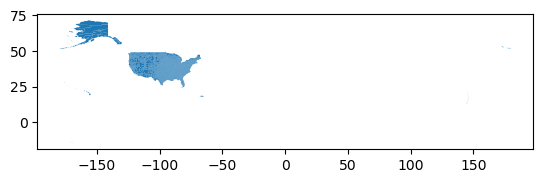

In [18]:
# d
# .plot() method to create rudimentary plot, sufficient for quick visualization of geo-dataframe
counties.plot()

**e. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.**

The method `.head()` returns the first five rows of our data frame. This gives us a quick snapshot of the rows and columns that we are working with, and also gives us a general idea of what some of the variables mean and how they are stored. Applying `.dtypes` to our data frame returns the data type of each column in the data frame, providing a clearer look at what kind of data we have. This may also help provide ideas as to what kind of operations we want to/can perform on the columns. The `.crs` method returns information on the coordinate reference system that the geometries of the database are based on; if we are familiar with the CRS, we might be able to have an idea of the orientation/shape/spread of the geometries as they are stored. Finally, by plotting our geodatabase we can visualize the area that our geometries cover. In this case, we see that our geodatabase contains information on the United States. Of note, is that some of the Alaskan islands are stored on the "other side" of the map.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [19]:
# Access and replace `counties` columns with lowercase text
# str.lower() converts strings to lowercase
counties.columns = counties.columns.str.lower()

# Confirm simplification worked
counties.columns

Index(['statefp', 'countyfp', 'countyns', 'geoid', 'geoidfq', 'name',
       'namelsad', 'lsad', 'classfp', 'mtfcc', 'csafp', 'cbsafp', 'metdivfp',
       'funcstat', 'aland', 'awater', 'intptlat', 'intptlon', 'geometry'],
      dtype='object')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them (you may need to look at the metadata).

Text(0.5, 1.0, 'New York States Counties')

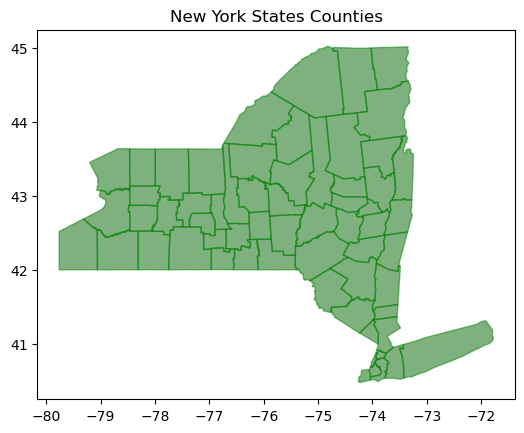

In [20]:
# Based on metadata, column `statefp` contains state identification codes; 36 corresponds to NY
# Subset based on `statefp`
ny_counties = counties[counties['statefp'] == '36']

# .plot() method to create rudimentary plot, sufficient for confirmation that subsetting worked
ny_counties.plot(color = "darkgreen", 
                 alpha = 0.5,
                 edgecolor= "green")         # Border of the counties set as a different green than counties (to see them better)

plt.title("New York States Counties")        # Setting plot title

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.


In [21]:
# Method .unique() applied to data frame gives us all of the county names, once
# 'name' column stores the county name
ny_counties['name'].unique()

array(['Steuben', 'Saratoga', 'Allegany', 'Oswego', 'Ulster',
       'St. Lawrence', 'Schuyler', 'Essex', 'Suffolk', 'Hamilton',
       'Dutchess', 'Otsego', 'Tompkins', 'Albany', 'Cayuga', 'Greene',
       'Herkimer', 'Warren', 'Jefferson', 'Clinton', 'Nassau', 'Madison',
       'Washington', 'Westchester', 'Lewis', 'Ontario', 'Cortland',
       'Richmond', 'Erie', 'Putnam', 'Montgomery', 'Sullivan', 'Orleans',
       'Oneida', 'Cattaraugus', 'Yates', 'Tioga', 'Monroe', 'Schoharie',
       'Broome', 'Rensselaer', 'Seneca', 'Queens', 'Genesee', 'Wayne',
       'Niagara', 'Kings', 'Chemung', 'Wyoming', 'New York', 'Columbia',
       'Chautauqua', 'Franklin', 'Onondaga', 'Chenango', 'Fulton',
       'Rockland', 'Livingston', 'Delaware', 'Orange', 'Schenectady',
       'Bronx'], dtype=object)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.

In [22]:
# Method .unique() applied to data frame gives us all of the county names, once
# 'county' column stores the county name
spills_per_county['county'].unique()

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'New Jersey - Region 2', 'New York', 'Niagara', 'Oneida',
       'Onondaga', 'Ontario', 'Orange', 'Orleans', 'Oswego', 'Otsego',
       'Putnam', 'Queens', 'Rensselaer', 'Richmond', 'Rockland',
       'Saratoga', 'Schenectady', 'Schoharie', 'Schuyler', 'Seneca',
       'St Lawrence', 'Steuben', 'Suffolk', 'Sullivan', 'Tioga',
       'Tompkins', 'Tuscarora Indian Reservation', 'Ulster', 'Warren',
       'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates'],
      dtype=object)

<!-- END QUESTION -->



c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 


In [23]:
# .setdiff1d() finds the differences between the unique county values of each data frame // .tolist() to convert to list 
# The order of arguments matters: will return what IS in the first argument, but not the second
diff_names_spills = np.setdiff1d(spills_per_county['county'].unique(), ny_counties['name'].unique()).tolist()


In [24]:
grader.check("7Ac")

7Ac results: All test cases passed!

d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [25]:
# Reverse the order to find what IS in ny_counties but not in spills_per_county
# And convert to a list again
diff_names_ny = np.setdiff1d(ny_counties['name'].unique(), spills_per_county['county'].unique()).tolist()

In [26]:
grader.check("7Ad")

7Ad results: All test cases passed!

e. What is the number of spills in 'Tuscarora Indian Reservation'?


In [27]:
# e. 
# Revert `county` to a column, not the index
spills_per_county = spills_per_county.reset_index()

# Subset spills_per_county to where 'county' is our county of interest, and select the `n_spills`
n_spills_tir = spills_per_county[spills_per_county['county'] == 'Tuscarora Indian Reservation'][['n_spills']]
n_spills_tir

# There is 1 spill in 'Tuscarora Indian Reservation'

,n_spills
56,1


### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and Verify the update was successful.


In [28]:
# Locate where `county` is equal to 'St Lawarence' using .loc, and replace
spills_per_county.loc[spills_per_county['county'] == 'St Lawrence', 'county'] = 'St.Lawrence'

# Verify update using if else statement; is 'St.Lawrence' now in spills_per_county?
if "St.Lawrence" in spills_per_county.county.values:
    print("Renaming worked")
else: print("Renaming did not work")

# Is St Lawrence still in there?
if "St Lawrence" in spills_per_county.county.values:
    print("Renaming did not work")
else: print("Renaming worked for sure!")

Renaming worked
Renaming worked for sure!


### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 


In [29]:
# In order to join data frames, they must share a column name
# Rename `name` in ny_counties to be `county` to match that of `spills_per_county`
ny_counties = ny_counties.rename(columns = {"name": "county"})

b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [30]:
# The .merge() function takes an argument for the type of join and the column to be joined by
ny_counties = pd.merge(ny_counties,
                       spills_per_county,
                       how = "inner",
                       on = "county")


From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [31]:

# In order to access county based on name, we set `county` column as index
ny_counties = ny_counties.set_index('county')

# Manually add 1 to the `n_spills` column at 'Niagara'
ny_counties.at['Niagara', 'n_spills'] += 1


## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation) and date of access



Text(-0.2, -0.65, 'Note: 1 spill at the Tuscarora Indian Reservation was manually added to Niagara county (not previously included)')

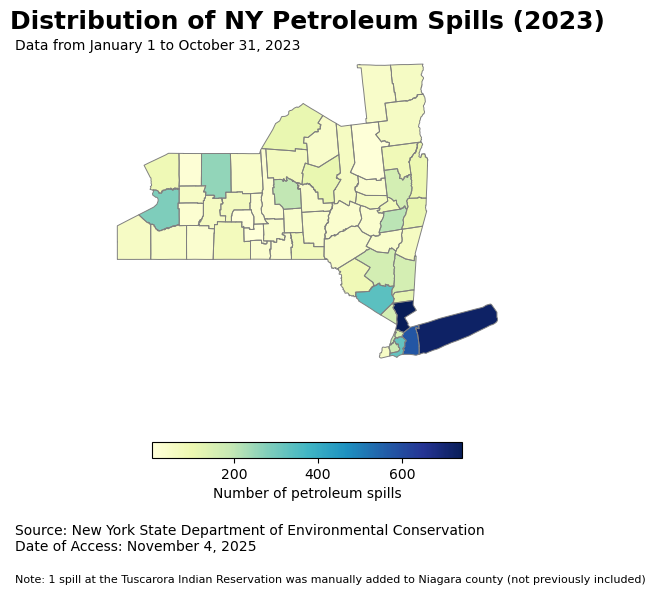

In [32]:
# Iniatlize figure with one axes
fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis
ax.axis('off')

# Plot ny_counties boundary to obtain county outlines
ny_counties.boundary.plot(ax = ax,
                          color = "gray",
                          linewidth = 0.7)

# Plot ny_counties, coloring by the number of petroleum spills in each
ny_counties.plot(ax = ax,
                 column = "n_spills",
                 legend = True,
                 cmap = "YlGnBu",
                 legend_kwds={"label": "Number of petroleum spills",        # Specify legend title
                              "orientation": "horizontal",                  
                              "shrink": 0.5})                               # Make legend smaller

# Add title and make it larger and bolded, with extra space before plot
ax.set_title("Distribution of NY Petroleum Spills (2023)", fontsize=18, weight='bold', pad=15)

# Add annotations to bottom left of axes
ax.annotate("Source: New York State Department of Environmental Conservation", xy = (-.2, -.5), xycoords = "axes fraction")
ax.annotate("Date of Access: November 4, 2025", xy = (-.2, -.55), xycoords = "axes fraction")
ax.annotate("Data from January 1 to October 31, 2023", xy = (-.2, 1), xycoords = "axes fraction")
ax.annotate("Note: 1 spill at the Tuscarora Indian Reservation was manually added to Niagara county (not previously included)",
             xy = (-.2, -.65), xycoords = "axes fraction", fontsize = 8)


b. Write a description of how the map was created, including key takeaways. If you need to do additional data analysis to include relevant information from the data, you may include additional cells here.

This map was created using the `matplotlib` Python library, which requires the initial creation of a figure and its axes to then map our figure onto. After this, there were two types of methods: either acting on the `ny_counties` data frame or on ax (the axes we were plotting on).

From `ny_counties`, boundary (the outline) was extracted and plotted in gray for a clear look. Then, a chloropleth map was plotted in the same place, filling in the county colors by the values of the specified column, `n_spills` (number of petroluem spills). A legend (with visual specifications) and colormap (cmap) were also specified.

Onto ax, we set a decriptive title and made it larger and bolded. This plot also contains annotation on the bottom left, for which text, xy coordinates, and xy coordinate units were specified. At the start, the axis of the plot was also removed from the axes.

**Key Takeaways:** Creating a matplot figure and axes gives more freedom with plot customization than soley using `.plot()` on the data frame of interest. There are a number of different specifications one can add using both `.plot()` and `fig`, such as colormap, legend title and size, and even adding or removing extra geometries (like our boundary layer).

## Complete workflow

**STILL WORKING ON THIS**

Collect all the relevant code into a **new notebook** titled `hwk3-task1-spills-COMPLETE-YOURLASTNAME.ipynb`. This notebook should have two sections:the a single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the assignment rubric.



**From last HW:**

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The only ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the assignment rubric.

##### Run the cell below to run all autograder tests. 

In [33]:
grader.check_all()

7Ac results: All test cases passed!

7Ad results: All test cases passed!

q5d results:
    q5d - 1 result:
        ❌ Test case failed
        Trying:
            def test_q3(student_data):
                try:
                    expected_data = pd.read_csv('data/q5d_df.csv').drop(columns='Unnamed: 0')
                    pd.testing.assert_frame_equal(expected_data, student_data)
                except AssertionError:
                    raise AssertionError('Incorrect answer.')
        Expecting nothing
        ok
        Trying:
            test_q3(spills_per_county)
        Expecting nothing
        **********************************************************************
        Line 7, in q5d 0
        Failed example:
            test_q3(spills_per_county)
        Exception raised:
            Traceback (most recent call last):
              File "<doctest q5d 0[0]>", line 4, in test_q3
                pd.testing.assert_frame_equal(expected_data, student_data)
              File "/op